# 퇴근 승차 인원 예측

**필요 라이브러리 임포트**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytimekr import pytimekr # 한국 공휴일 빼오는 라이브러리
from datetime import datetime, date #평일 공휴일 구분 가능한 라이브러리
import seaborn as sns

## 1. 데이터 가져오기

In [4]:
df_train = pd.read_csv("./datasets/train.csv")

In [5]:
df_passenger = pd.read_csv("./datasets/bus_bts.csv")

In [6]:
df_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_card_id         float64
 1   bus_route_id         int64  
 2   vhc_id               int64  
 3   geton_date           object 
 4   geton_time           object 
 5   geton_station_code   int64  
 6   geton_station_name   object 
 7   getoff_date          object 
 8   getoff_time          object 
 9   getoff_station_code  float64
 10  getoff_station_name  object 
 11  user_category        int64  
 12  user_count           int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB



## 2. 데이터 훑어보기

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [9]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,415413,415414,415415,415416,415417,415418,415419,415420,415421,415422
id,0,1,2,3,4,5,6,7,8,9,...,415413,415414,415415,415416,415417,415418,415419,415420,415421,415422
date,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,...,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30
bus_route_id,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,...,32810000,32820000,32820000,32820000,32820000,32820000,32820000,32820000,32820000,32820000
in_out,시외,시외,시외,시내,시내,시내,시외,시외,시외,시내,...,시내,시내,시내,시내,시내,시내,시내,시내,시내,시내
station_code,344,357,432,1579,1646,1648,1660,1666,1726,2008,...,6115100,96,737,786,1080,1129,1564,2322,3291,6115100
station_name,제주썬호텔,한라병원,정존마을,제주국제공항(600번),중문관광단지입구,예래입구,제주국제컨벤션센터중문대포해안주상절리대,창천리,강정농협,서귀포항,...,서귀포시외버스터미널,제주민속오일장,한림고등학교,고산환승정류장(고산1리),애월고등학교,한림환승정류장(한림리),제주시외버스터미널,해병부대,애월환승정류장(애월리),서귀포시외버스터미널
latitude,33.4899,33.48944,33.48181,33.50577,33.25579,33.25862,33.24309,33.26598,33.23603,33.23977,...,33.24873,33.49376,33.39918,33.30073,33.46262,33.41437,33.49946,33.231,33.46483,33.24873
longitude,126.49373,126.48508,126.47352,126.49252,126.4126,126.40442,126.42472,126.37082,126.47827,126.5645,...,126.50799,126.4767,126.25841,126.18044,126.33447,126.26336,126.51479,126.26273,126.3187,126.50799
6~7_ride,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0
7~8_ride,1.0,4.0,1.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_train['bus_route_id'].value_counts()

28510000    4393
28490000    4346
28500000    4207
28700000    4082
28690000    3892
            ... 
31060000       2
21590000       2
30080000       2
31040000       1
28800000       1
Name: bus_route_id, Length: 613, dtype: int64

In [ ]:
# 버스 루트 아이디란 무엇인가
# 버스 노선이 아니라 특정 지점에서 지점까지의 경로마다 할당한
# 고윳값 번호라면
# 버스인데, 1~30일까지의 데이터인데 한개인게 말이 되는가?
# 제주도에는 한달에 한번 나가는 버스가 존재하는가?


In [24]:
df_train[df_train['station_code']==344].T

,0,11538,26498,41983,56722,72428,87780,97978,109560,124857,...,277476,289010,295063,310687,326655,342518,358388,374196,387415,399539
id,0,11538,26498,41983,56722,72428,87780,97978,109560,124857,...,277476,289010,295063,310687,326655,342518,358388,374196,387415,399539
date,2019-09-01,2019-09-02,2019-09-03,2019-09-04,2019-09-05,2019-09-06,2019-09-07,2019-09-08,2019-09-09,2019-09-10,...,2019-09-21,2019-09-22,2019-09-23,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30
bus_route_id,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,...,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000,4270000
in_out,시외,시외,시외,시외,시외,시외,시외,시외,시외,시외,...,시외,시외,시외,시외,시외,시외,시외,시외,시외,시외
station_code,344,344,344,344,344,344,344,344,344,344,...,344,344,344,344,344,344,344,344,344,344
station_name,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,...,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔,제주썬호텔
latitude,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,...,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899,33.4899
longitude,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,...,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373,126.49373
6~7_ride,0.0,1.0,2.0,3.0,2.0,0.0,1.0,1.0,4.0,1.0,...,0.0,0.0,5.0,1.0,5.0,3.0,2.0,0.0,1.0,3.0
7~8_ride,1.0,8.0,4.0,3.0,4.0,3.0,1.0,1.0,3.0,2.0,...,3.0,1.0,5.0,4.0,3.0,1.0,4.0,1.0,2.0,5.0


In [28]:
df_train[df_train['bus_route_id']==28510000].T

,6404,6405,6406,6407,6408,6409,6410,6411,6412,6413,...,408062,408063,408064,408065,408066,408067,408068,408069,408070,408071
id,6404,6405,6406,6407,6408,6409,6410,6411,6412,6413,...,408062,408063,408064,408065,408066,408067,408068,408069,408070,408071
date,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01,...,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30,2019-09-30
bus_route_id,28510000,28510000,28510000,28510000,28510000,28510000,28510000,28510000,28510000,28510000,...,28510000,28510000,28510000,28510000,28510000,28510000,28510000,28510000,28510000,28510000
in_out,시내,시내,시내,시내,시내,시내,시내,시내,시내,시내,...,시내,시내,시내,시내,시내,시내,시내,시내,시내,시내
station_code,147,164,165,167,177,192,193,222,223,226,...,2834,2969,2989,3099,3123,3455,4050,4051,6103005,6115101
station_name,용천마을,광양사거리,탐라장애인종합복지관,홍랑로입구,문서교,함덕환승정류장(함덕해수욕장),함덕리(4구),삼양동주민센터,삼양2동,조천리,...,남원취락구조,제주버스터미널(종점),신흥1번지,동복리관광체험어장,하도리서문동,동문성당,매일올레시장7번입구,위미3리,서귀포시구시외버스터미널,서귀포시외버스터미널(가상정류소)
latitude,33.49991,33.50047,33.50023,33.49997,33.52777,33.54101,33.53998,33.52128,33.52128,33.53578,...,33.27496,33.49919,33.30573,33.55329,33.52002,33.51007,33.24909,33.27531,33.25217,33.24894
longitude,126.52135,126.5271,126.52563,126.52387,126.61328,126.66914,126.67323,126.58567,126.58236,126.63625,...,126.70031,126.51632,126.77368,126.7156,126.87133,126.53237,126.56706,126.68672,126.56052,126.50813
6~7_ride,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0
7~8_ride,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0


## 3. 데이터 세트분리
- 데이터는 나눠져있지만, 학습용으로 트레인만 일단 활용

## 4. 데이터 탐색

### 4.1 데이터 시각화

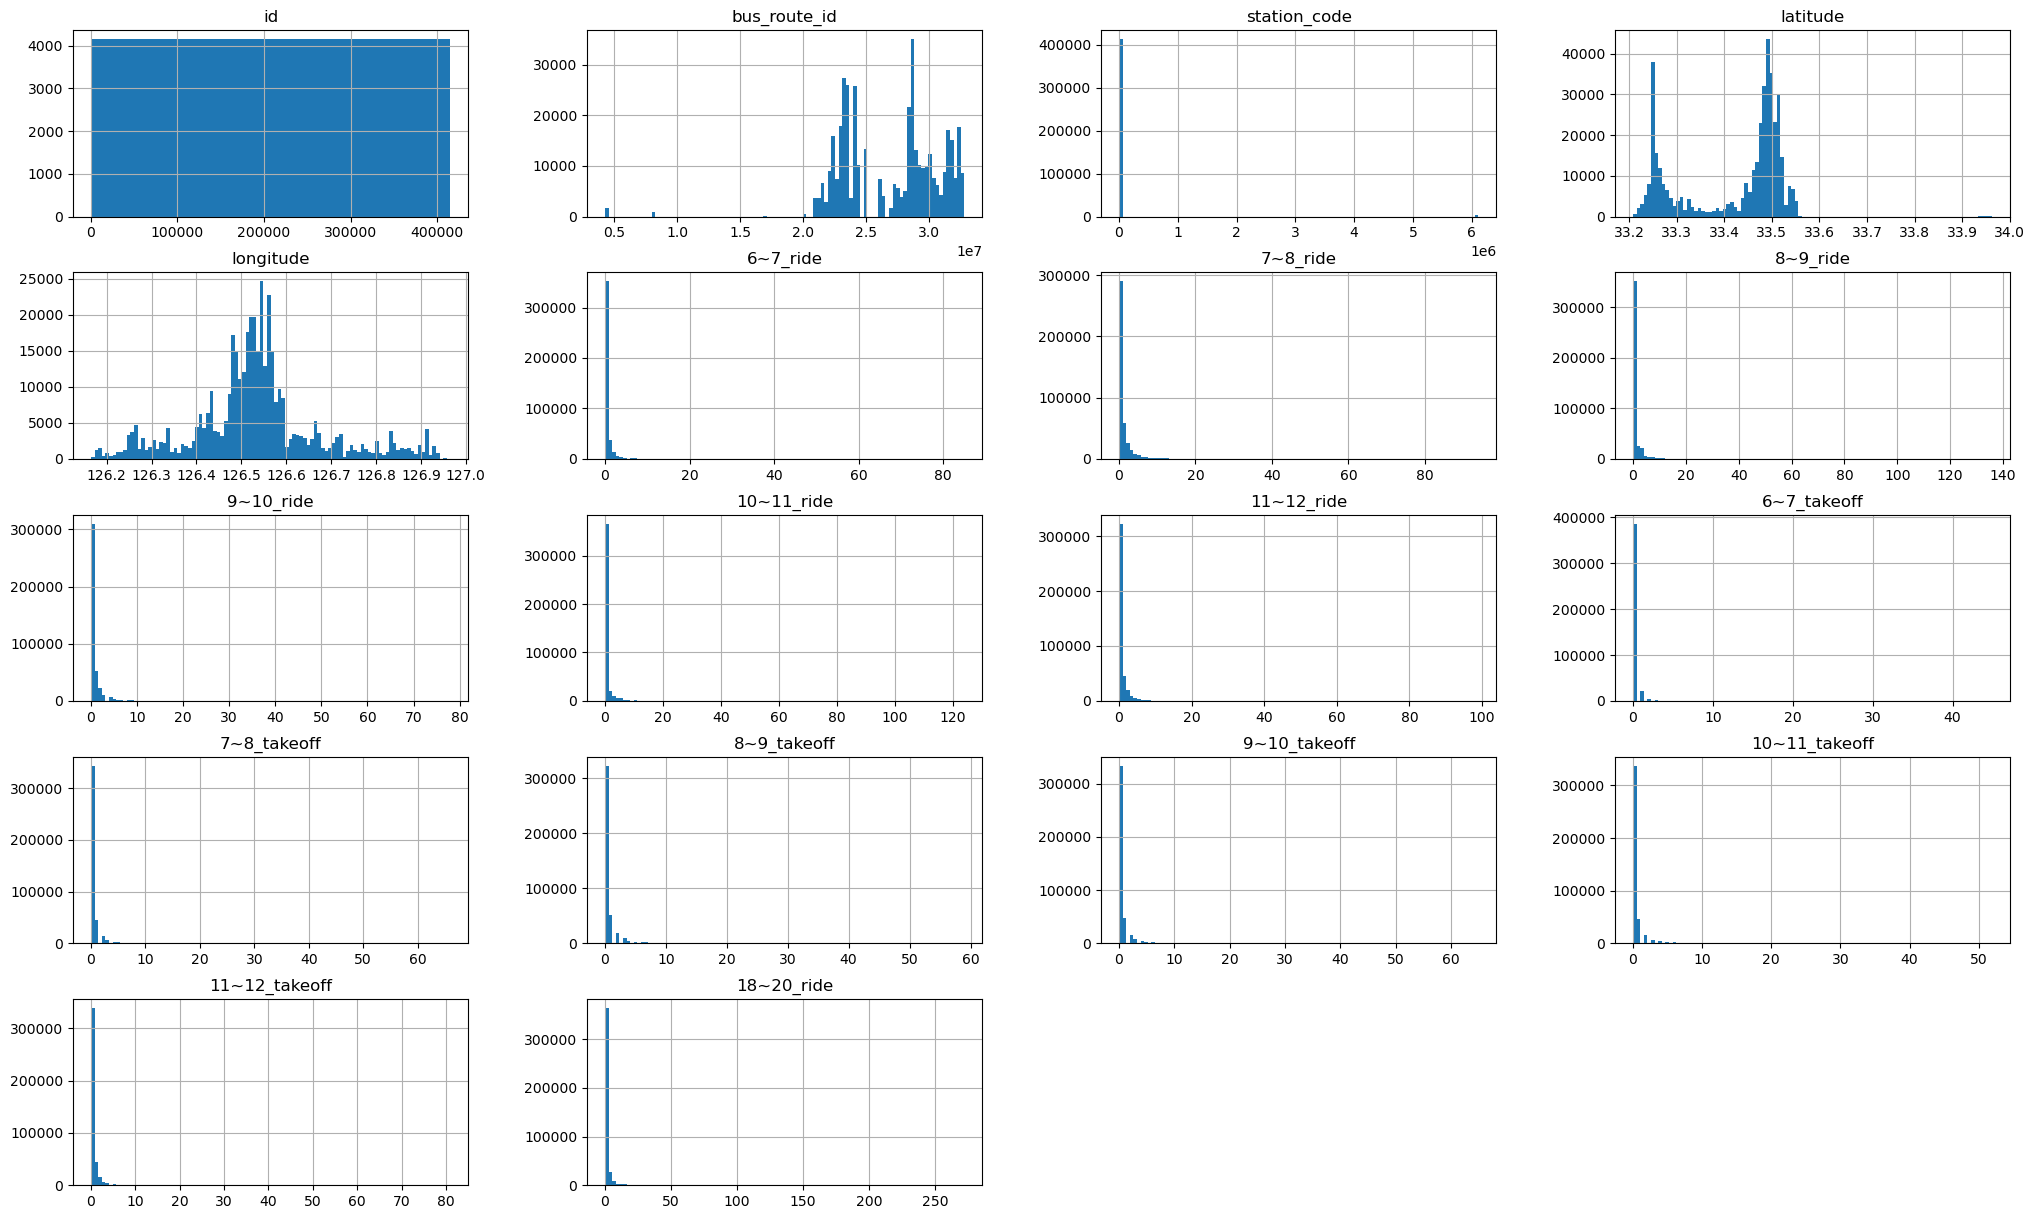

In [10]:
df_train.hist(figsize=(25, 15), bins=100)
plt.show()

### 4.2 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

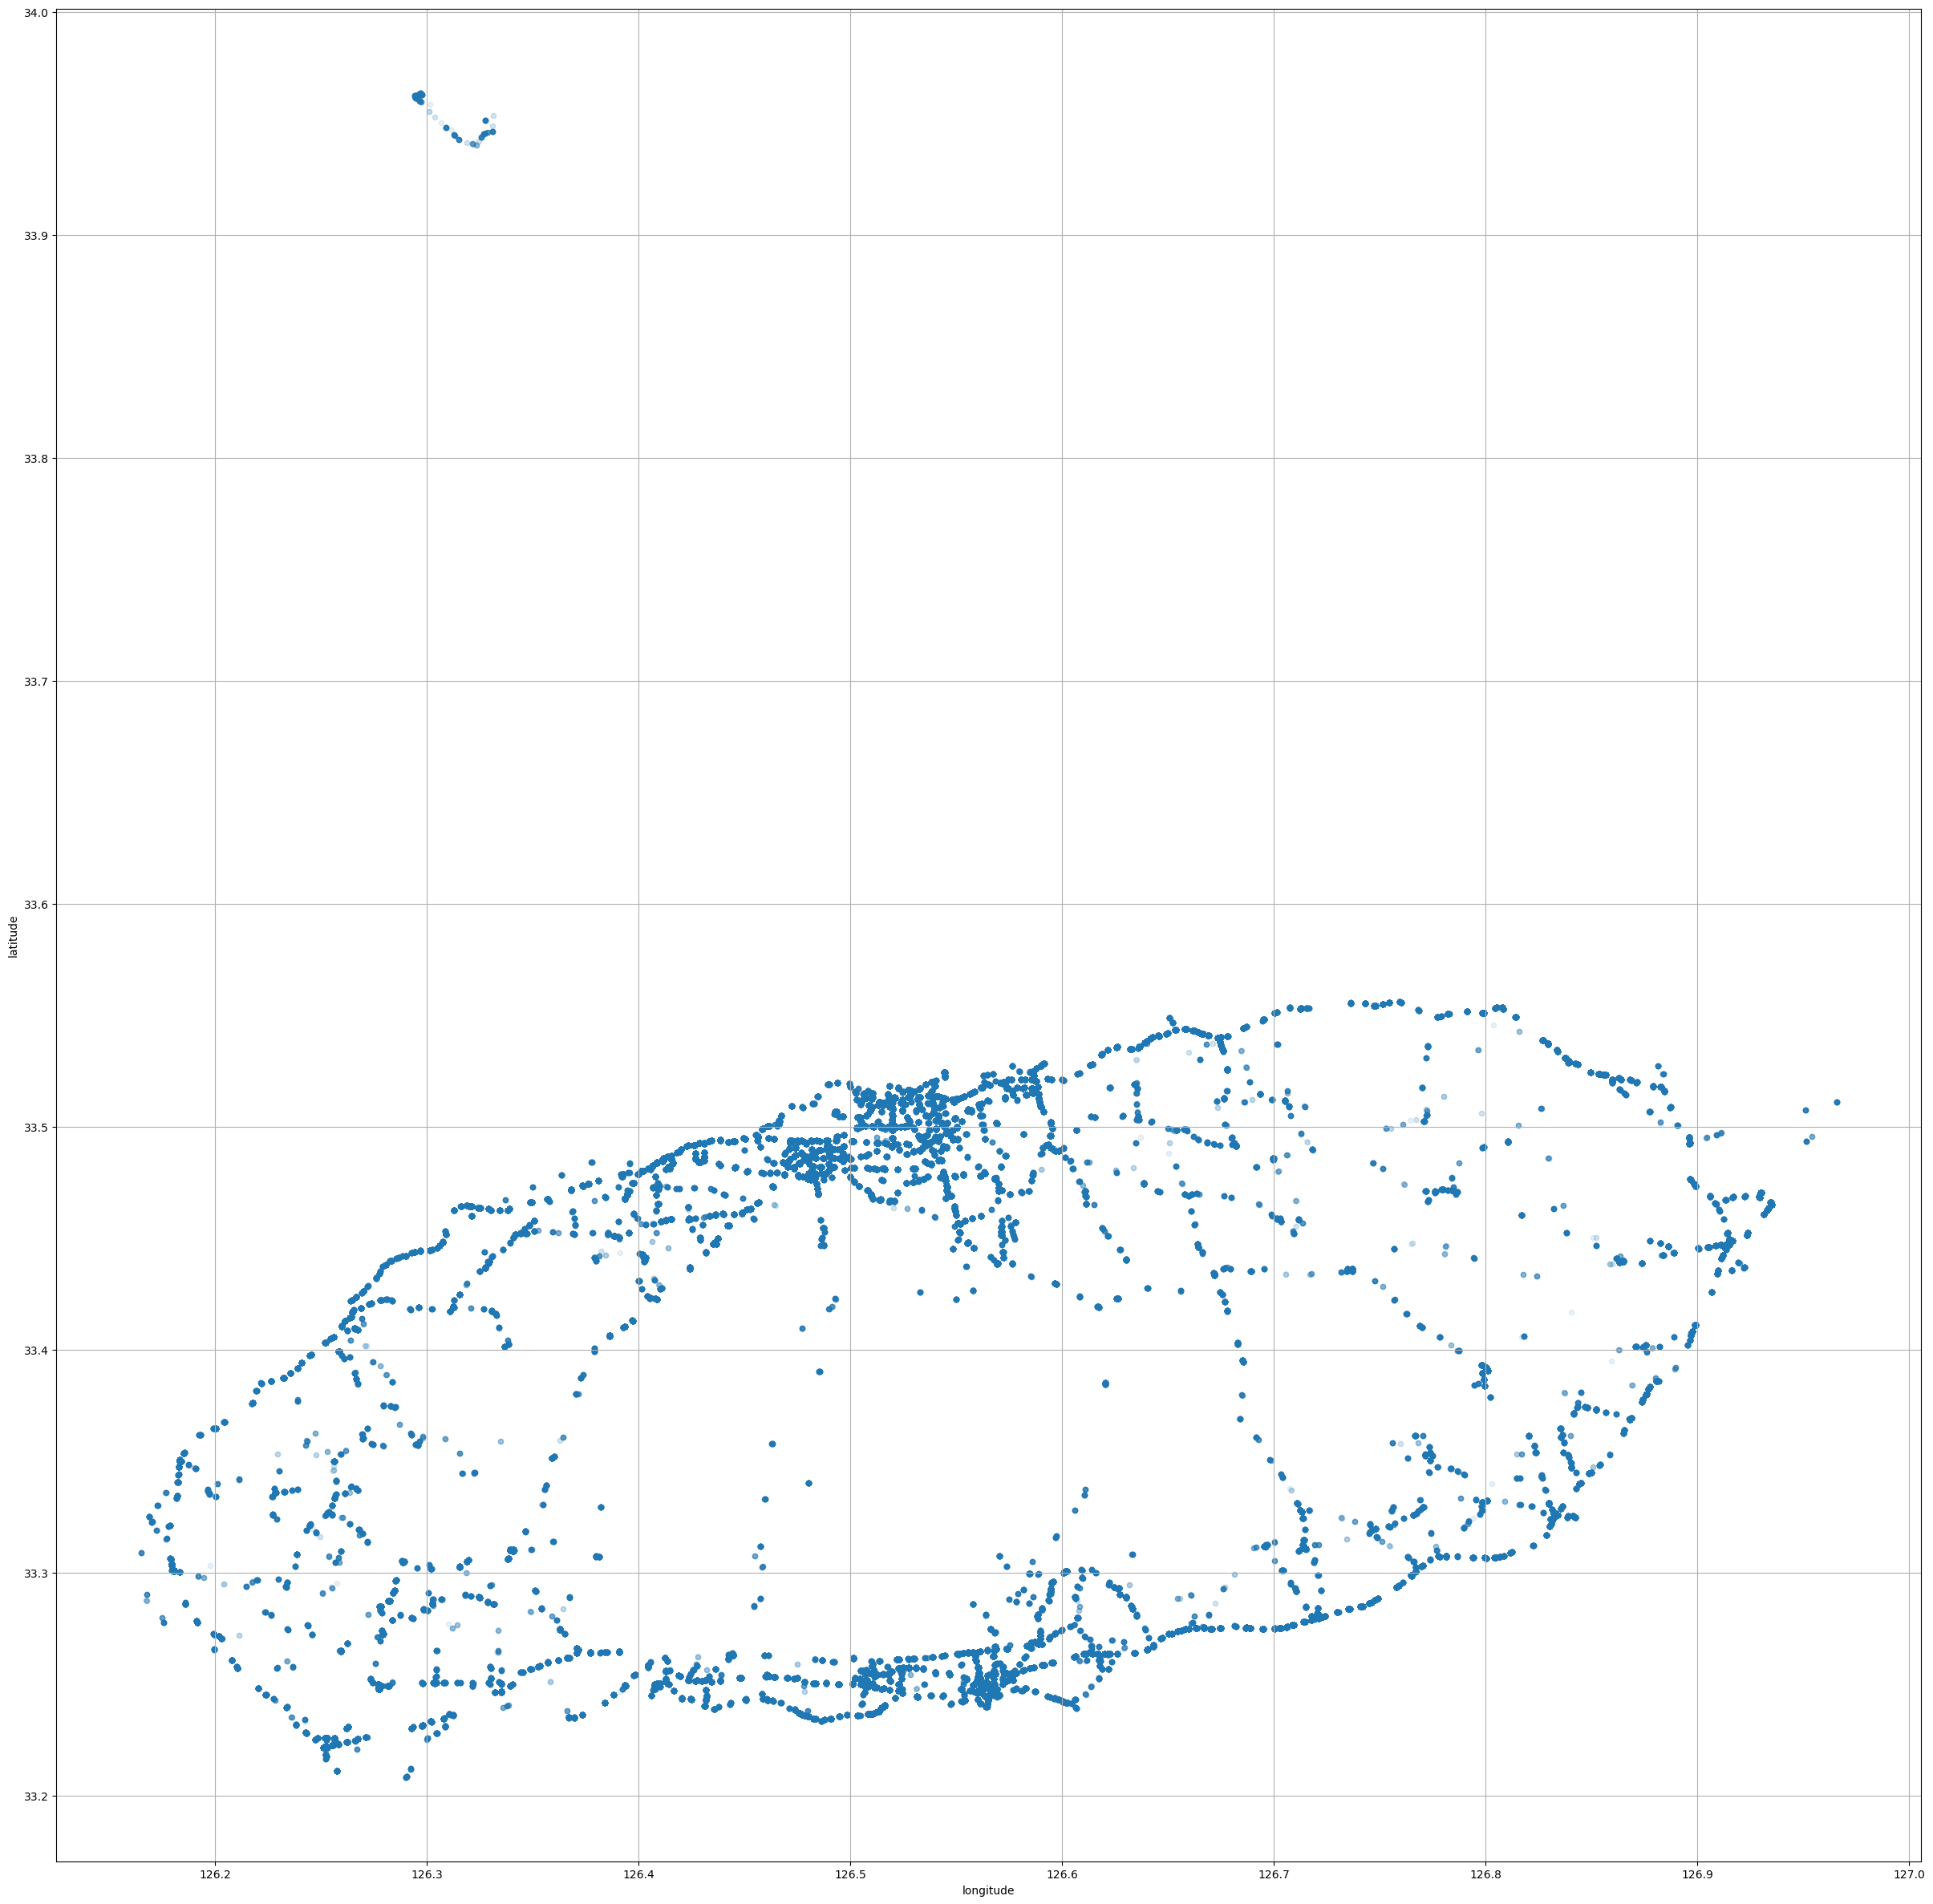

In [11]:
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, grid=True
              ,figsize=(30, 30))

In [ ]:
# 하루에 모두 탄 사람을 모아서 한 칼럼을 만들어서 넣으면 시각화 하기 좋겠지?
#

## 4.3 상관관계 조사

In [13]:
df_train.corr()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
id,1.000000,0.035830,-0.002053,-0.013783,-0.000816,0.000852,0.005181,0.007540,0.003844,-0.001189,-0.002990,0.002609,0.004733,0.008766,0.005899,0.002119,-0.000701,-0.000544
bus_route_id,0.035830,1.000000,-0.015897,-0.196758,0.010187,-0.070173,-0.119180,-0.127838,-0.137973,-0.129171,-0.129354,-0.019856,-0.081713,-0.102422,-0.114123,-0.116376,-0.111560,-0.143702
station_code,-0.002053,-0.015897,1.000000,-0.048951,-0.011303,0.036374,0.055432,0.057153,0.054709,0.050765,0.050141,-0.003185,0.020918,0.020559,0.022664,0.024277,0.025059,0.034360
latitude,-0.013783,-0.196758,-0.048951,1.000000,0.134208,0.045578,0.067125,0.066391,0.065680,0.059462,0.059777,0.050534,0.047558,0.055750,0.067264,0.058728,0.057602,0.079261
longitude,-0.000816,0.010187,-0.011303,0.134208,1.000000,-0.009556,-0.015767,-0.019433,-0.008536,-0.007532,-0.008551,-0.010856,-0.021163,-0.030240,-0.013897,-0.007629,-0.005170,-0.021368
6~7_ride,0.000852,-0.070173,0.036374,0.045578,-0.009556,1.000000,0.375844,0.296554,0.313622,0.279269,0.265106,0.131812,0.031980,0.019047,0.029102,0.030359,0.029797,0.262173
7~8_ride,0.005181,-0.119180,0.055432,0.067125,-0.015767,0.375844,1.000000,0.479535,0.427030,0.395135,0.389945,0.068717,0.184060,0.129881,0.106197,0.117298,0.135832,0.371751
8~9_ride,0.007540,-0.127838,0.057153,0.066391,-0.019433,0.296554,0.479535,1.000000,0.506296,0.458034,0.453017,0.085007,0.122234,0.303641,0.192257,0.175396,0.206125,0.445316
9~10_ride,0.003844,-0.137973,0.054709,0.065680,-0.008536,0.313622,0.427030,0.506296,1.000000,0.537374,0.517800,0.126445,0.144562,0.194736,0.339456,0.246237,0.241739,0.494085
10~11_ride,-0.001189,-0.129171,0.050765,0.059462,-0.007532,0.279269,0.395135,0.458034,0.537374,1.000000,0.542494,0.117809,0.144040,0.196125,0.241713,0.359848,0.268409,0.512666


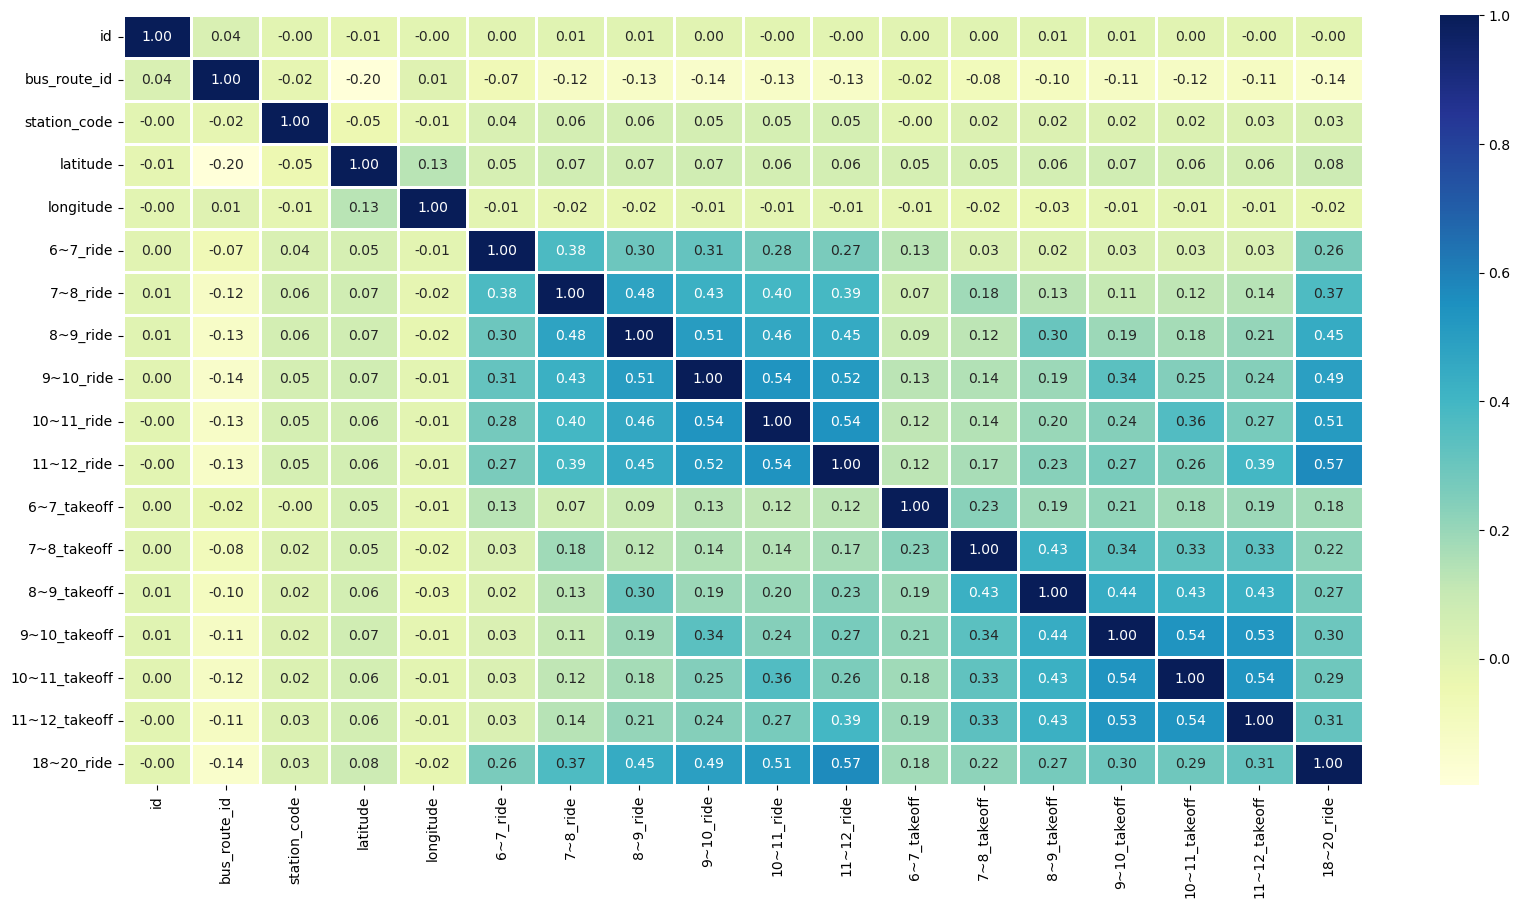

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

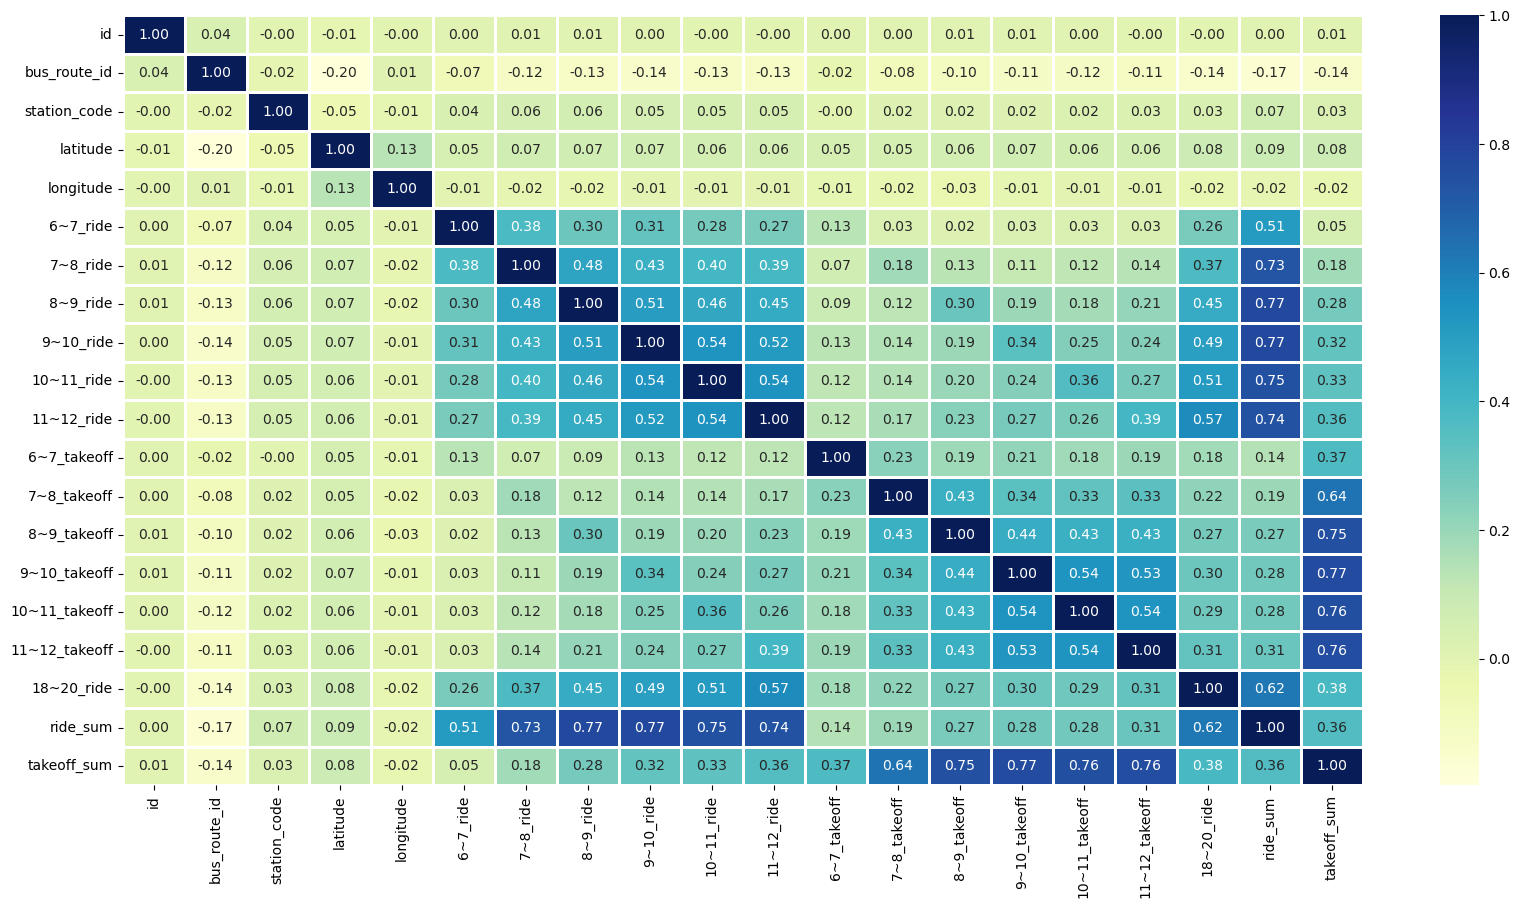

In [16]:
df_train['ride_sum'] = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']
df_train['takeoff_sum'] = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 5. 데이터 전처리

### 5.1 범주데이터 처리

In [32]:
#시내 시외를 0과 1로 변경
# Define the mapping dictionary
mapping_dict = {'시내': 0, '시외': 1}

# Apply the mapping dictionary to the "location" column
df_train['in_out'] = df_train['in_out'].map(mapping_dict)

In [33]:
df_station_name = df_train['station_name']
df_train.drop('station_name', axis=1, inplace=True)
df_station_name['station_code'] = df1['station_code']
#실패함 ㅠ

In [ ]:
#이름-코드 같이 빼는건 나중에 합시다.

In [38]:
df_station_name['station_code'] = df1['station_code']

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype(float)
df['month'] = df['date'].dt.month.astype(float)
df['day'] = df['date'].dt.day.astype(float)

# Drop the original date column
df.drop('date', axis=1, inplace=True)
# 분리해서 뭐할건데? -> 평일/주말/공휴일등 구분하여 코드 부여.